# 2. Collect Positive and Anchor

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
# Setup Paths
POS_PATH = os.path.join("data", "positive")
NEG_PATH = os.path.join("data", "negative")
ANC_PATH = os.path.join("data", "anchor")

#### Downlaod the dataset from kaggle

In [102]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/lfw-dataset")

print("Path to dataset files:", path)

/home/breezy/Study/pyhton_3_12_env/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/breezy/.cache/kagglehub/datasets/jessicali9530/lfw-dataset/versions/4


#### Move to the cache to project folder

In [103]:
import os
import shutil

data_path = os.path.join(os.getcwd(), "data")

for item in os.listdir(path):
    source_file = os.path.join(path, item)
    destination_file = os.path.join(data_path, item)
    if os.path.isdir(source_file):
        shutil.copytree(source_file, destination_file, dirs_exist_ok=True)
    else:
        shutil.copy(source_file, destination_file)


In [104]:
import os
import shutil

data_path = os.path.join(os.getcwd(), "data")
source_path = path

# Create data directory if it doesn't exist
os.makedirs(data_path, exist_ok=True)

for item in os.listdir(source_path):
    source_file = os.path.join(source_path, item)
    destination_file = os.path.join(data_path, item)

    # Copy only directories (folders), skip CSV files
    if os.path.isdir(source_file):
        shutil.copytree(source_file, destination_file, dirs_exist_ok=True)
        print(f"✓ Copied folder: {item}")
    else:
        print(f"✗ Skipped file: {item} (not a folder)")

✗ Skipped file: lfw_allnames.csv (not a folder)
✗ Skipped file: matchpairsDevTrain.csv (not a folder)
✓ Copied folder: lfw-deepfunneled
✗ Skipped file: peopleDevTrain.csv (not a folder)
✗ Skipped file: people.csv (not a folder)
✗ Skipped file: lfw_readme.csv (not a folder)
✗ Skipped file: matchpairsDevTest.csv (not a folder)
✗ Skipped file: mismatchpairsDevTest.csv (not a folder)
✗ Skipped file: peopleDevTest.csv (not a folder)
✗ Skipped file: pairs.csv (not a folder)
✗ Skipped file: mismatchpairsDevTrain.csv (not a folder)


#### Change the name of the folder and the move to negative folder

In [105]:
base_dir = "data/lfw-deepfunneled"  # Parent folder
old_folder_name = "lfw-deepfunneled"
new_folder_name = "lfw"

old_path = os.path.join(base_dir, old_folder_name)
new_path = os.path.join(base_dir, new_folder_name)

try:
    os.rename(old_path, new_path)
    print(f"Folder '{old_path}' renamed to '{new_path}' successfully.")
except OSError as e:
    print(f"Error renaming folder: {e}")


Folder 'data/lfw-deepfunneled/lfw-deepfunneled' renamed to 'data/lfw-deepfunneled/lfw' successfully.


In [106]:
import os

# Define correct paths
SOURCE_BASE = "data/lfw-deepfunneled/lfw"  # Correct source path

for directory in os.listdir(SOURCE_BASE):
    dir_path = os.path.join(SOURCE_BASE, directory)

    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            EX_PATH = os.path.join(SOURCE_BASE, directory, file)
            NEW_PATH = os.path.join(NEG_PATH, file)

            # Check if file exists before moving
            if os.path.exists(EX_PATH):
                os.replace(EX_PATH, NEW_PATH)
                print(f"✓ Moved: {file}")
            else:
                print(f"✗ File not found: {EX_PATH}")

✓ Moved: Steven_Tyler_0001.jpg
✓ Moved: Ben_Wallace_0001.jpg
✓ Moved: Gerard_Butler_0001.jpg
✓ Moved: Aiysha_Smith_0001.jpg
✓ Moved: Sonya_Walger_0001.jpg
✓ Moved: Junichi_Inamoto_0001.jpg
✓ Moved: Jose_Carreras_0001.jpg
✓ Moved: Gary_Gero_0001.jpg
✓ Moved: Alan_Zemaitis_0001.jpg
✓ Moved: Drew_Barrymore_0001.jpg
✓ Moved: Drew_Barrymore_0002.jpg
✓ Moved: Rolandas_Paksas_0002.jpg
✓ Moved: Rolandas_Paksas_0001.jpg
✓ Moved: Evgeni_Plushenko_0001.jpg
✓ Moved: George_Voinovich_0003.jpg
✓ Moved: George_Voinovich_0001.jpg
✓ Moved: George_Voinovich_0002.jpg
✓ Moved: Imelda_Marcos_0001.jpg
✓ Moved: Matt_Damon_0002.jpg
✓ Moved: Matt_Damon_0004.jpg
✓ Moved: Matt_Damon_0003.jpg
✓ Moved: Matt_Damon_0001.jpg
✓ Moved: Louis_Van_Gaal_0001.jpg
✓ Moved: Mary_Elizabeth_Mastrantonio_0001.jpg
✓ Moved: Philip_Cummings_0001.jpg
✓ Moved: Jodie_Henry_0001.jpg
✓ Moved: Ward_Cuff_0001.jpg
✓ Moved: Lucie_Lapovsky_0001.jpg
✓ Moved: Francisco_Flores_0003.jpg
✓ Moved: Francisco_Flores_0001.jpg
✓ Moved: Francisco_Flor

In [107]:
import shutil

folder_path = "data/lfw-deepfunneled"

try:
    shutil.rmtree(folder_path)
    print(f"✓ Folder '{folder_path}' and all contents deleted successfully.")
except OSError as e:
    print(f"✗ Error: {e}")

✓ Folder 'data/lfw-deepfunneled' and all contents deleted successfully.


### 2.2 Collect Positive and Anchor Classes

In [108]:
# import uuid library to generate unique image names
# universally unique identification according to RFC 4122
import uuid

In [109]:
uuid.uuid1()

UUID('30a5ef37-9cf6-11f0-bb21-581122864d18')

In [110]:
import uuid
import cv2
import os

# Setup Paths
POS_PATH = os.path.join("data", "positive")
NEG_PATH = os.path.join("data", "negative")
ANC_PATH = os.path.join("data", "anchor")

# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # cut down the frame to 250px x 250px
    frame = frame[180:180 + 250, 180:180 + 250, :]

    # collect positives
    if cv2.waitKey(1) & 0xFF == ord('p'):
        # create the unique file path
        imgName = os.path.join(POS_PATH, f"{uuid.uuid1()}.jpg")
        # Write out anchor image
        cv2.imwrite(imgName, frame)

    # collect anchors
    if cv2.waitKey(1) & 0xFF == ord('a'):
        # create the unique file path
        imgName = os.path.join(ANC_PATH, f"{uuid.uuid1()}.jpg")
        # Write out anchor image
        cv2.imwrite(imgName, frame)

    # collect positives
    if cv2.waitKey(1) & 0xFF == ord('p'):
        # create the unique file path
        imgName = os.path.join(POS_PATH, f"{uuid.uuid1()}.jpg")
        # Write out anchor image
        cv2.imwrite(imgName, frame)

    # Show image back to screen
    cv2.imshow("Image Collection", frame)

    #Breaking gracefully 1 == 1ms
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

In [111]:
 #plt.imshow(frame)
frame.shape

(250, 250, 3)

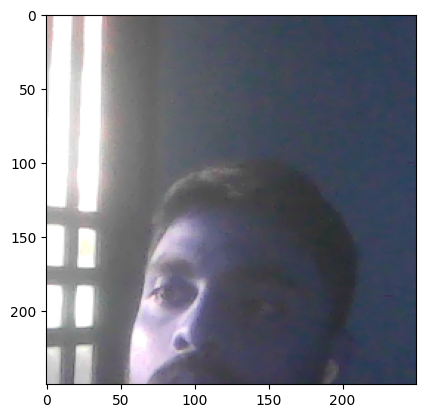

In [112]:
plt.imshow(frame)